In [ ]:
import keras
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input
import tensorflow as tf

In [ ]:
train_datagen = ImageDataGenerator(
        preprocessing_function=preprocess_input,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/new งู/งู train set',
        target_size=(224, 224),
        batch_size=64,
        class_mode='categorical')

#Creating generator for Validation DataSet
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_generator = val_datagen.flow_from_directory(
        '/content/drive/MyDrive/new งู/งู validate set',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

#Creating generator for Test DataSet
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/new งู/งู test set',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

Found 15162 images belonging to 43 classes.
Found 2216 images belonging to 43 classes.
Found 2306 images belonging to 43 classes.


In [ ]:
base_model=keras.applications.vgg16.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3))

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
model=Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(2048,activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.35))
model.add(Dense(2048,activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.35))
model.add(Dense(2048,activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.35))
model.add(Dense(43,activation='softmax',kernel_initializer='glorot_normal'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 2048)              51382272  
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 2048)              4196352   
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 2048)              4

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
history=model.fit(train_generator,epochs=40,validation_data=val_generator,workers=10,use_multiprocessing=True)

Epoch 1/40
237/237 [==============================] - 1062s 4s/step - loss: 10.3883 - accuracy: 0.1171 - val_loss: 3.1537 - val_accuracy: 0.2315
Epoch 2/40
237/237 [==============================] - 109s 446ms/step - loss: 3.5977 - accuracy: 0.1741 - val_loss: 2.8837 - val_accuracy: 0.2545
Epoch 3/40
237/237 [==============================] - 110s 444ms/step - loss: 3.1506 - accuracy: 0.2215 - val_loss: 2.7945 - val_accuracy: 0.2694
Epoch 4/40
237/237 [==============================] - 110s 444ms/step - loss: 2.9055 - accuracy: 0.2619 - val_loss: 2.6876 - val_accuracy: 0.2983
Epoch 5/40
237/237 [==============================] - 110s 442ms/step - loss: 2.7035 - accuracy: 0.3074 - val_loss: 2.5939 - val_accuracy: 0.3132
Epoch 6/40
237/237 [==============================] - 110s 444ms/step - loss: 2.5762 - accuracy: 0.3313 - val_loss: 2.5467 - val_accuracy: 0.3285
Epoch 7/40
237/237 [==============================] - 110s 444ms/step - loss: 2.4369 - accuracy: 0.3609 - val_loss: 2.4970 - 

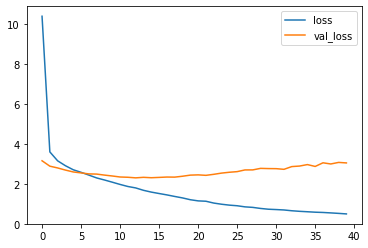

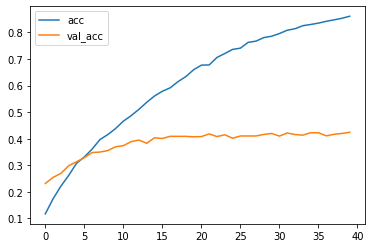

In [ ]:
#Some visualizations
import matplotlib.pyplot as plt
#Loss
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()
#Accuracy
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()

In [ ]:
base_model=model.layers[0]

In [ ]:
base_model.trainable = True

set_trainable = False
for layer in base_model.layers:
    if layer.name == 'block4_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
base_model.summary()
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_generator,epochs=30,validation_data=val_generator,workers=10,use_multiprocessing=True)

Epoch 1/30
237/237 [==============================] - 113s 453ms/step - loss: 1.4060 - accuracy: 0.6225 - val_loss: 2.4794 - val_accuracy: 0.3673
Epoch 2/30
237/237 [==============================] - 111s 449ms/step - loss: 1.1906 - accuracy: 0.6775 - val_loss: 2.4729 - val_accuracy: 0.3912
Epoch 3/30
237/237 [==============================] - 112s 453ms/step - loss: 0.9950 - accuracy: 0.7234 - val_loss: 2.6247 - val_accuracy: 0.3958
Epoch 4/30
237/237 [==============================] - 111s 450ms/step - loss: 0.9367 - accuracy: 0.7418 - val_loss: 2.4859 - val_accuracy: 0.4039
Epoch 5/30
237/237 [==============================] - 111s 451ms/step - loss: 0.8456 - accuracy: 0.7583 - val_loss: 2.6891 - val_accuracy: 0.4237
Epoch 6/30
237/237 [==============================] - 111s 451ms/step - loss: 0.7636 - accuracy: 0.7789 - val_loss: 2.4493 - val_accuracy: 0.4346
Epoch 7/30
237/237 [==============================] - 111s 448ms/step - loss: 0.7312 - accuracy: 0.7911 - val_loss: 2.4711 -

In [ ]:
model.save("model_fine_tuned")
model.save("/content/drive/MyDrive/model_fine_tuned")
print("ok")

INFO:tensorflow:Assets written to: model_fine_tuned/assets
INFO:tensorflow:Assets written to: /content/drive/MyDrive/model_fine_tuned/assets
ok


In [ ]:
model.save("/content/drive/MyDrive/save model/all_snake_47.h5")

In [ ]:

test_datagen = ImageDataGenerator(
        preprocessing_function=preprocess_input,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)
test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/new งู/test 2',
        target_size=(224, 224),
        batch_size=64,
        class_mode='categorical')

Found 2197 images belonging to 43 classes.


In [ ]:
# model.evaluate(test_generator,use_multiprocessing=True,workers=10)
loss, accuracy = model.evaluate(test_generator)

35/35 [==============================] - 31s 880ms/step - loss: 2.7116 - accuracy: 0.4725


In [ ]:
test_generator.image_shape

(224, 224, 3)

In [ ]:
# score = model.evaluate(x_test, y_test, verbose = 0) 

print('Test loss:', loss) 
print('Test accuracy:',accuracy)

Test loss: 2.725768566131592
Test accuracy: 0.4779244363307953


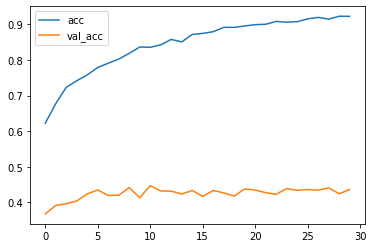

In [ ]:
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()

In [ ]:
test_generator.class_indices 

{'งูกะปะ': 0,
 'งูกินทากหัวโหนก': 1,
 'งูก้นขบหางแดง': 2,
 'งูคออ่อนปากจงอย': 3,
 'งูงวงช้าง': 4,
 'งูชายธงหลังดำ': 5,
 'งูดินบ้าน': 6,
 'งูทับสมิงคลา': 7,
 'งูทางมะพร้าว': 8,
 'งูปลิง': 9,
 'งูปล้องฉนวน': 10,
 'งูปล้องทอง': 11,
 'งูปล้องหวายลายขวั้นดำ': 12,
 'งูปากกว้างน้ำเค็ม': 13,
 'งูปี่แก้ว': 14,
 'งูพริกท้องแดง': 15,
 'งูพริกสีน้ำตาล': 16,
 'งูพังกา': 17,
 'งูม่านทอง': 18,
 'งูลายสอ': 19,
 'งูลายสาบ': 20,
 'งูลายสาบตาโต': 21,
 'งูสมิงทะเล': 22,
 'งูสามเหลี่ยม': 23,
 'งูสายม่าน': 24,
 'งูสิงตาโต': 25,
 'งูหมอก': 26,
 'งูหลาม': 27,
 'งูเขียว': 28,
 'งูเขียวกาบหมาก': 29,
 'งูเขียวปากจิ้งจก': 30,
 'งูเขียวพระอินทร์': 31,
 'งูเขียวหางเทา': 32,
 'งูเขียวหางไหม้ตาโต': 33,
 'งูเขียวหางไหม้ท้องเขียวใต้': 34,
 'งูเขียวหางไหม้ท้องเหลือง': 35,
 'งูเหลือม': 36,
 'งูเห่า': 37,
 'งูแมวเซา': 38,
 'งูแม่ตะงาวรังนก': 39,
 'งูแสงอาทิตย์': 40,
 'งูแส้หางม้า': 41,
 'จงอาง': 42}

In [ ]:
test_generator.labels

array([ 0,  0,  0, ..., 42, 42, 42], dtype=int32)